In [1]:
#1. Load wine data from the two source files winequality-red.csv and winequalitywhite.csv.
import pandas as pd

red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')



In [2]:
# Check for missing values
print(red_wine.isnull().sum())
print(white_wine.isnull().sum())

# Fill or drop missing values
red_wine = red_wine.dropna()
white_wine = white_wine.dropna()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [3]:
red_wine['type'] = 'red'
white_wine['type'] = 'white'

wine_data = pd.concat([red_wine, white_wine], ignore_index=True)


In [4]:
print(wine_data.shape)
print(wine_data.dtypes)


(6497, 13)
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

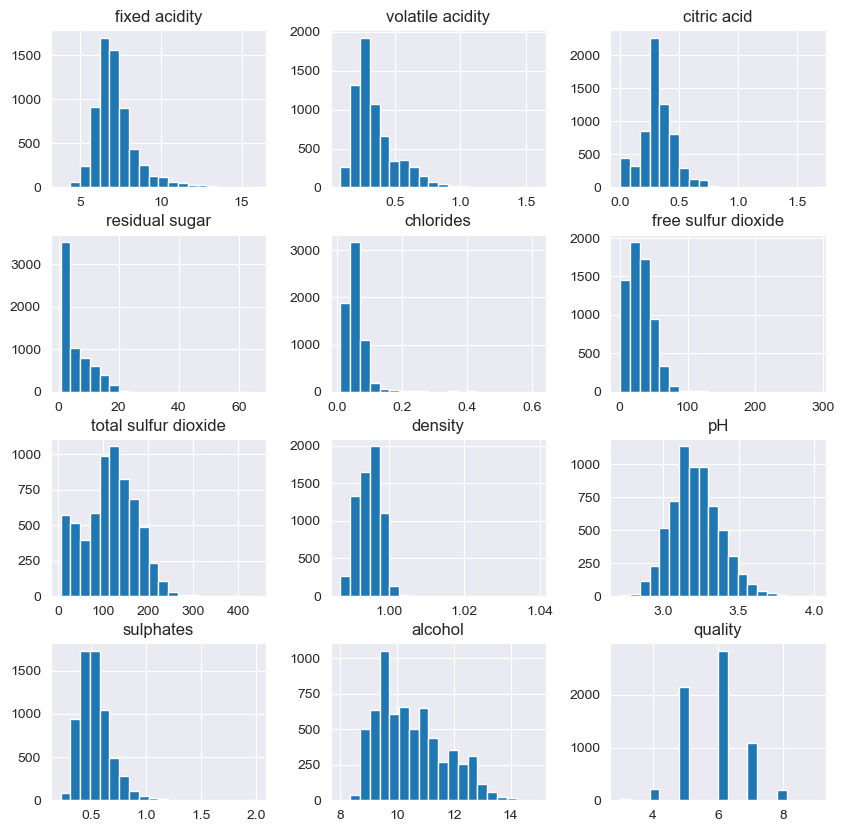

In [5]:
print(wine_data.describe())

import matplotlib.pyplot as plt
wine_data.hist(bins=20, figsize=(10, 10))
plt.show()


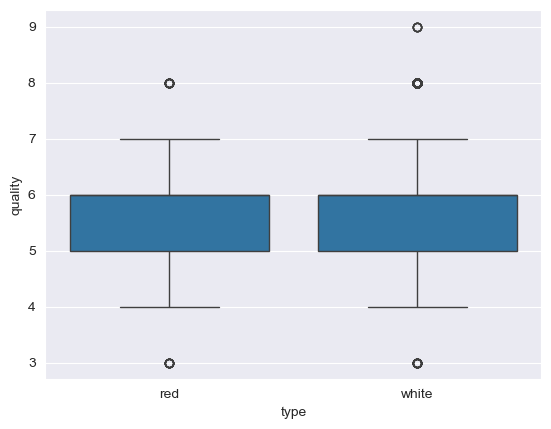

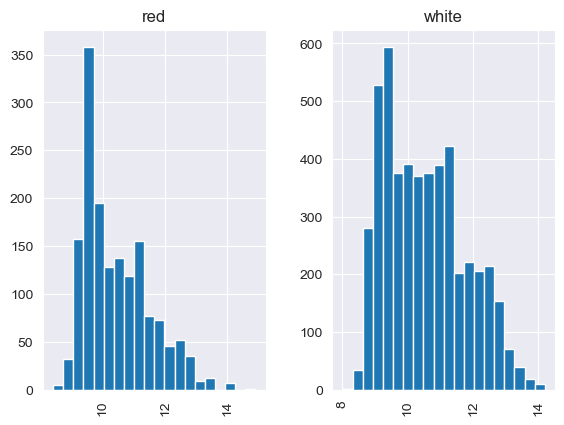

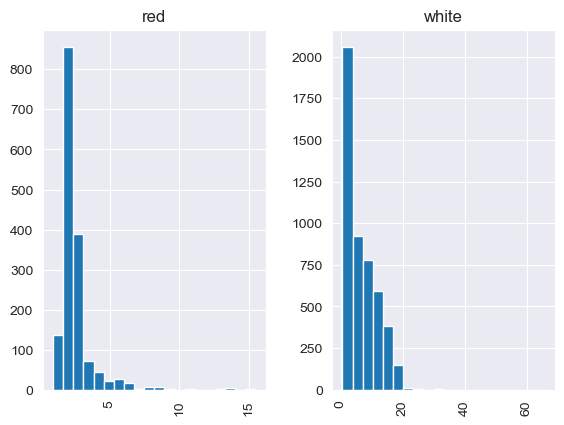

In [6]:
import seaborn as sns

# Box plot for quality
sns.boxplot(x='type', y='quality', data=wine_data)
plt.show()

# Histograms for alcohol and residual sugar
wine_data['alcohol'].hist(by=wine_data['type'], bins=20)
plt.show()

wine_data['residual sugar'].hist(by=wine_data['type'], bins=20)
plt.show()


In [7]:
print(wine_data.groupby('type')['quality'].mean())
print(wine_data.groupby('type')['alcohol'].mean())
print(wine_data.groupby('type')['residual sugar'].mean())

# Correlation between alcohol, residual sugar, and quality
print(wine_data[['alcohol', 'residual sugar', 'quality']].corr())


type
red      5.636023
white    5.877909
Name: quality, dtype: float64
type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64
type
red      2.538806
white    6.391415
Name: residual sugar, dtype: float64
                 alcohol  residual sugar   quality
alcohol         1.000000       -0.359415  0.444319
residual sugar -0.359415        1.000000 -0.036980
quality         0.444319       -0.036980  1.000000


In [8]:
wine_data['pH_bins'] = pd.cut(wine_data['pH'], bins=5)
print(wine_data['pH_bins'].value_counts())

wine_data['pH_bins_10'] = pd.cut(wine_data['pH'], bins=10)
print(wine_data['pH_bins_10'].value_counts())


pH_bins
(2.978, 3.236]    3344
(3.236, 3.494]    2465
(2.719, 2.978]     350
(3.494, 3.752]     322
(3.752, 4.01]       16
Name: count, dtype: int64
pH_bins_10
(3.107, 3.236]    2111
(3.236, 3.365]    1663
(2.978, 3.107]    1233
(3.365, 3.494]     802
(2.849, 2.978]     334
(3.494, 3.623]     263
(3.623, 3.752]      59
(2.719, 2.849]      16
(3.752, 3.881]      12
(3.881, 4.01]        4
Name: count, dtype: int64


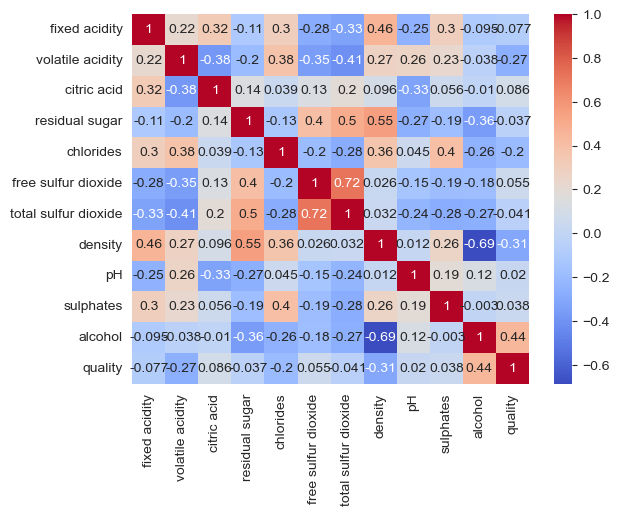

In [9]:
# Exclude the 'type' and 'pH_bins' columns
corr = wine_data.drop(columns=['type', 'pH_bins', 'pH_bins_10']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


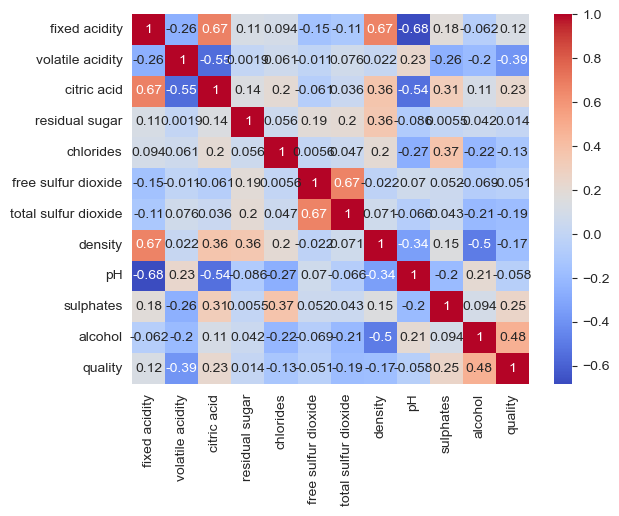

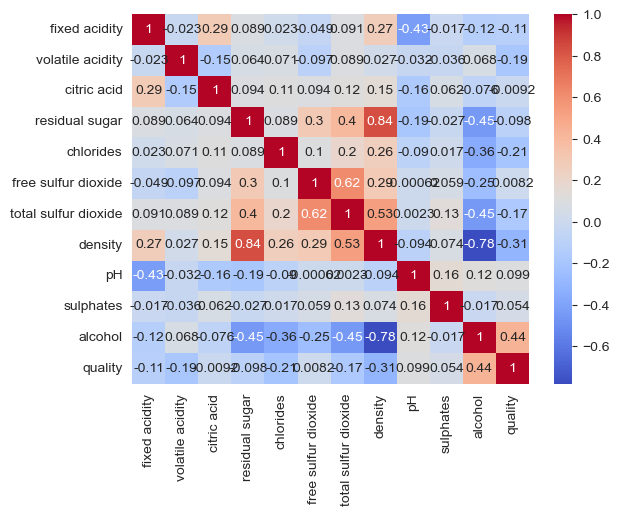

In [10]:
red_corr = red_wine.drop(columns=['type']).corr()
white_corr = white_wine.drop(columns=['type']).corr()


sns.heatmap(red_corr, annot=True, cmap='coolwarm')
plt.show()

sns.heatmap(white_corr, annot=True, cmap='coolwarm')
plt.show()


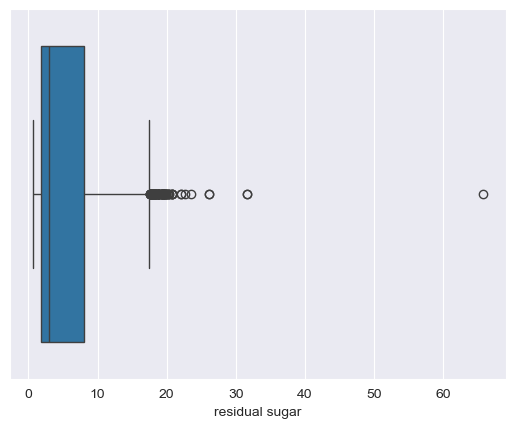

In [11]:
sns.boxplot(x='residual sugar', data=wine_data)
plt.show()

# Remove outliers
Q1 = wine_data['residual sugar'].quantile(0.25)
Q3 = wine_data['residual sugar'].quantile(0.75)
IQR = Q3 - Q1
outliers = wine_data[(wine_data['residual sugar'] < (Q1 - 1.5 * IQR)) | (wine_data['residual sugar'] > (Q3 + 1.5 * IQR))]
wine_data = wine_data.drop(outliers.index)


In [12]:
# Select only numeric columns
numeric_wine_data = wine_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_wine_data.corr()

# Identify the attribute with the lowest correlation to 'quality'
lowest_corr_attribute = corr_matrix['quality'].drop('quality').idxmin()

# Drop the attribute with the lowest correlation
wine_data = wine_data.drop(columns=[lowest_corr_attribute])

print(f"Dropped attribute: {lowest_corr_attribute}")

Dropped attribute: density


In [13]:
wine_data = pd.get_dummies(wine_data, drop_first=True)


In [14]:
print(wine_data.sample(10))


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1772            6.3             0.220         0.43            4.55      0.038   
2828            8.3             0.330         0.42            1.15      0.033   
3704            6.8             0.320         0.34            6.00      0.050   
3744            7.2             0.200         0.31           10.00      0.054   
587             7.3             0.730         0.24            1.90      0.108   
3112            7.3             0.220         0.49            9.90      0.031   
2987            7.3             0.180         0.29            1.20      0.044   
843             7.1             0.685         0.35            2.00      0.088   
185             8.9             0.310         0.57            2.00      0.111   
1362           11.6             0.475         0.40            1.40      0.091   

      free sulfur dioxide  total sulfur dioxide    pH  sulphates    alcohol  \
1772                 31.0    